# Second-Phase-Practice-Projects--4-

# Problem 3 - World Happiness Report Project


Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.

# solution

In [26]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = data = pd.read_csv("happiness_score_dataset.csv")
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [23]:
Happiness_score = df.pop('Happiness Score')

# Insert the 'Happiness Score' column at the end
df['Happiness Score'] = Happiness_score


In [24]:
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


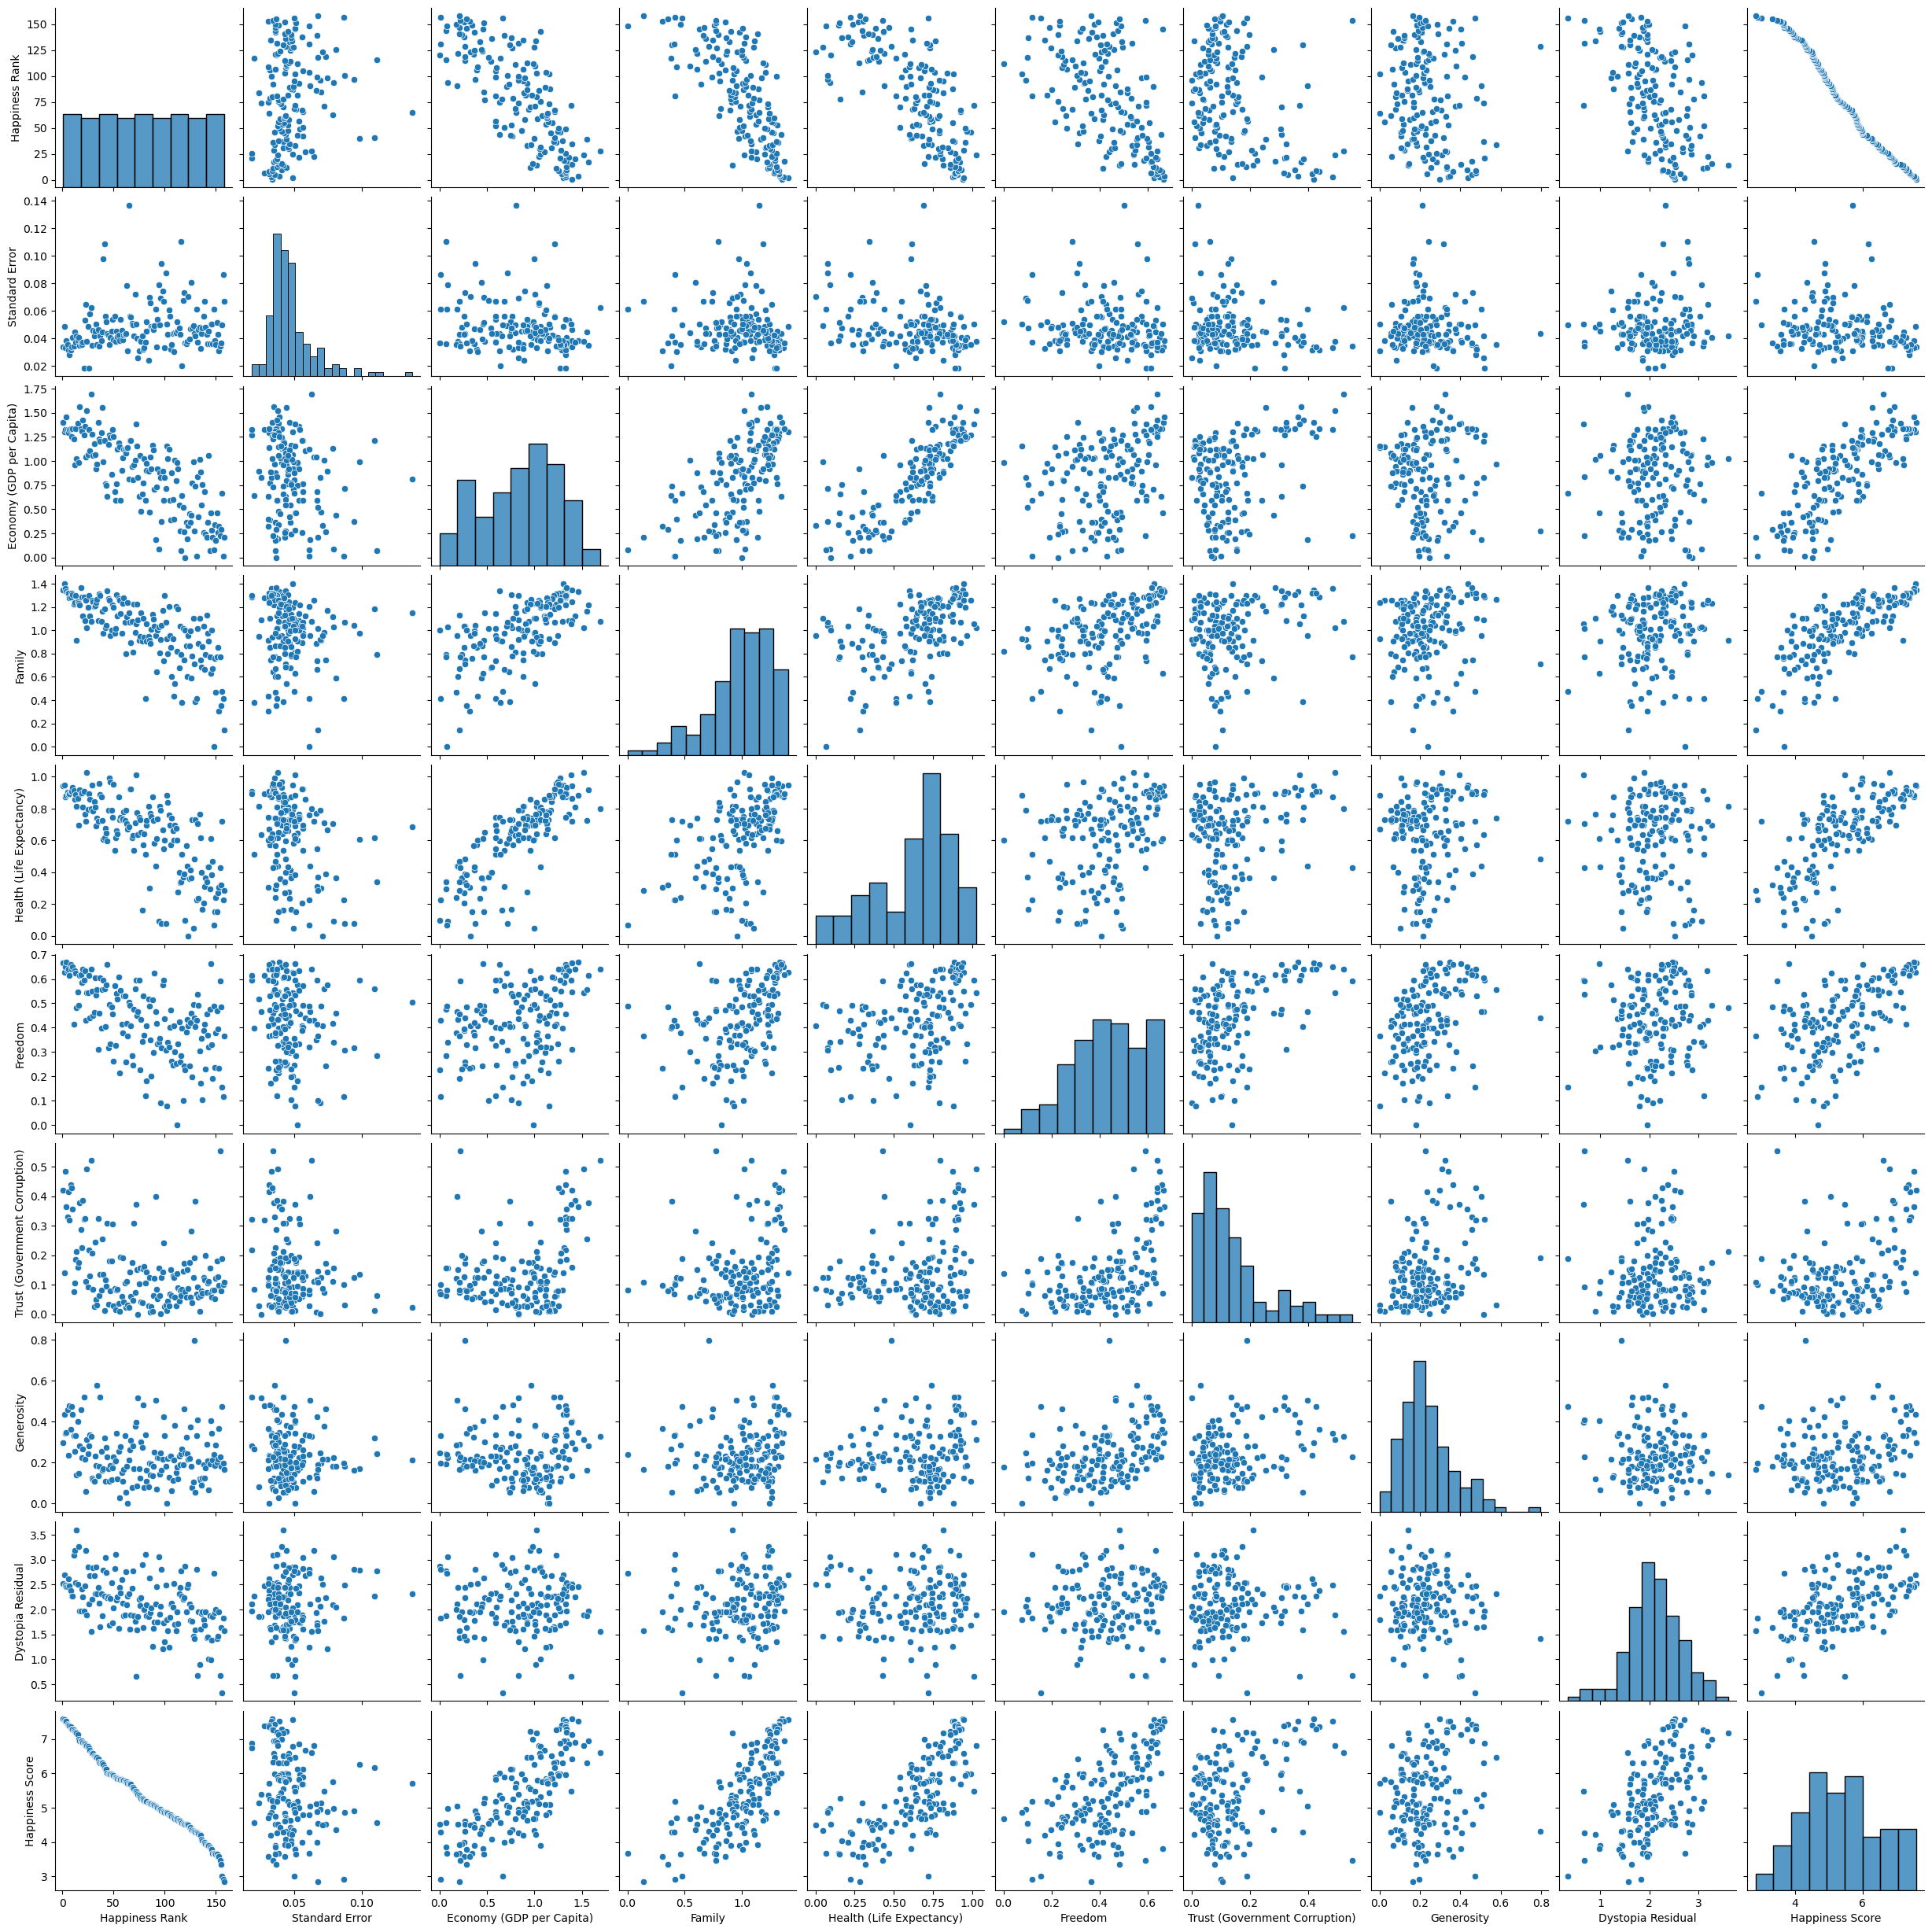

In [44]:
sns.pairplot(data = df , palette = 'Dark2')

In [27]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

 no null values present in the data

# EDA 

In [28]:
df.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


In [36]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Happiness Score']

In [38]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [30]:
df.shape

(158, 12)

<Axes: >

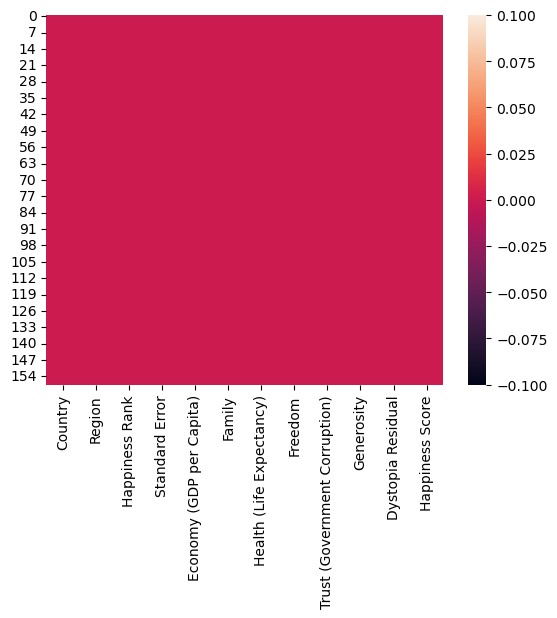

In [39]:
# visualize using heatmap

sns.heatmap(df.isnull())

In [40]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64


1.39651    1
0.3975

In [42]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [ ]:
plt.figure()

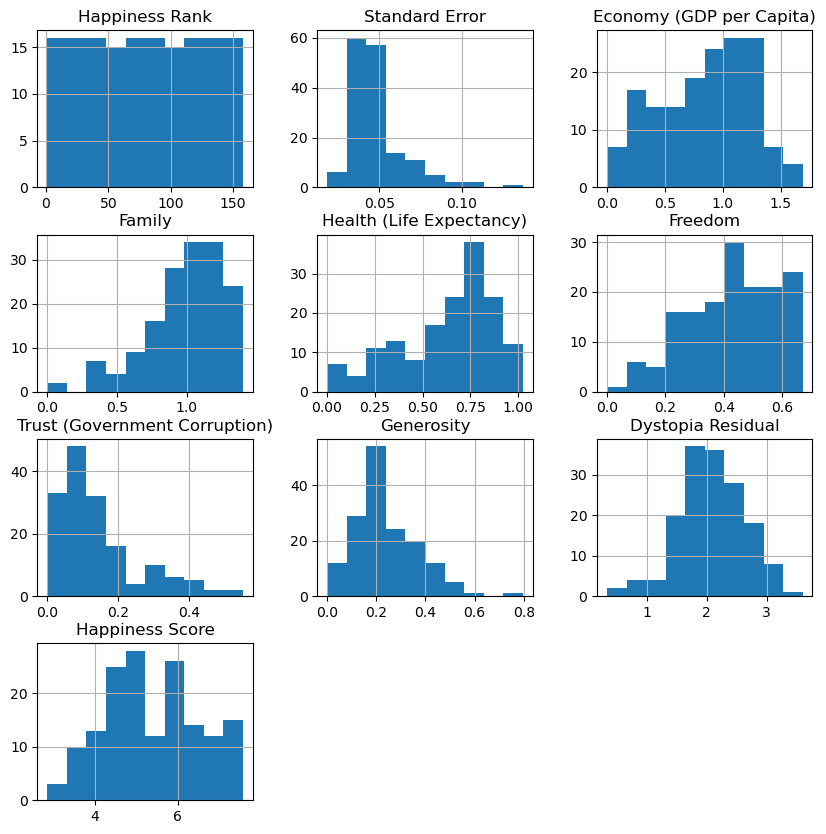

In [31]:
df.hist(bins = 10, figsize = (10,10))
plt.show()

# Label encoding 

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['Country'] = le.fit_transform(df['Country'])
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


# Outliers

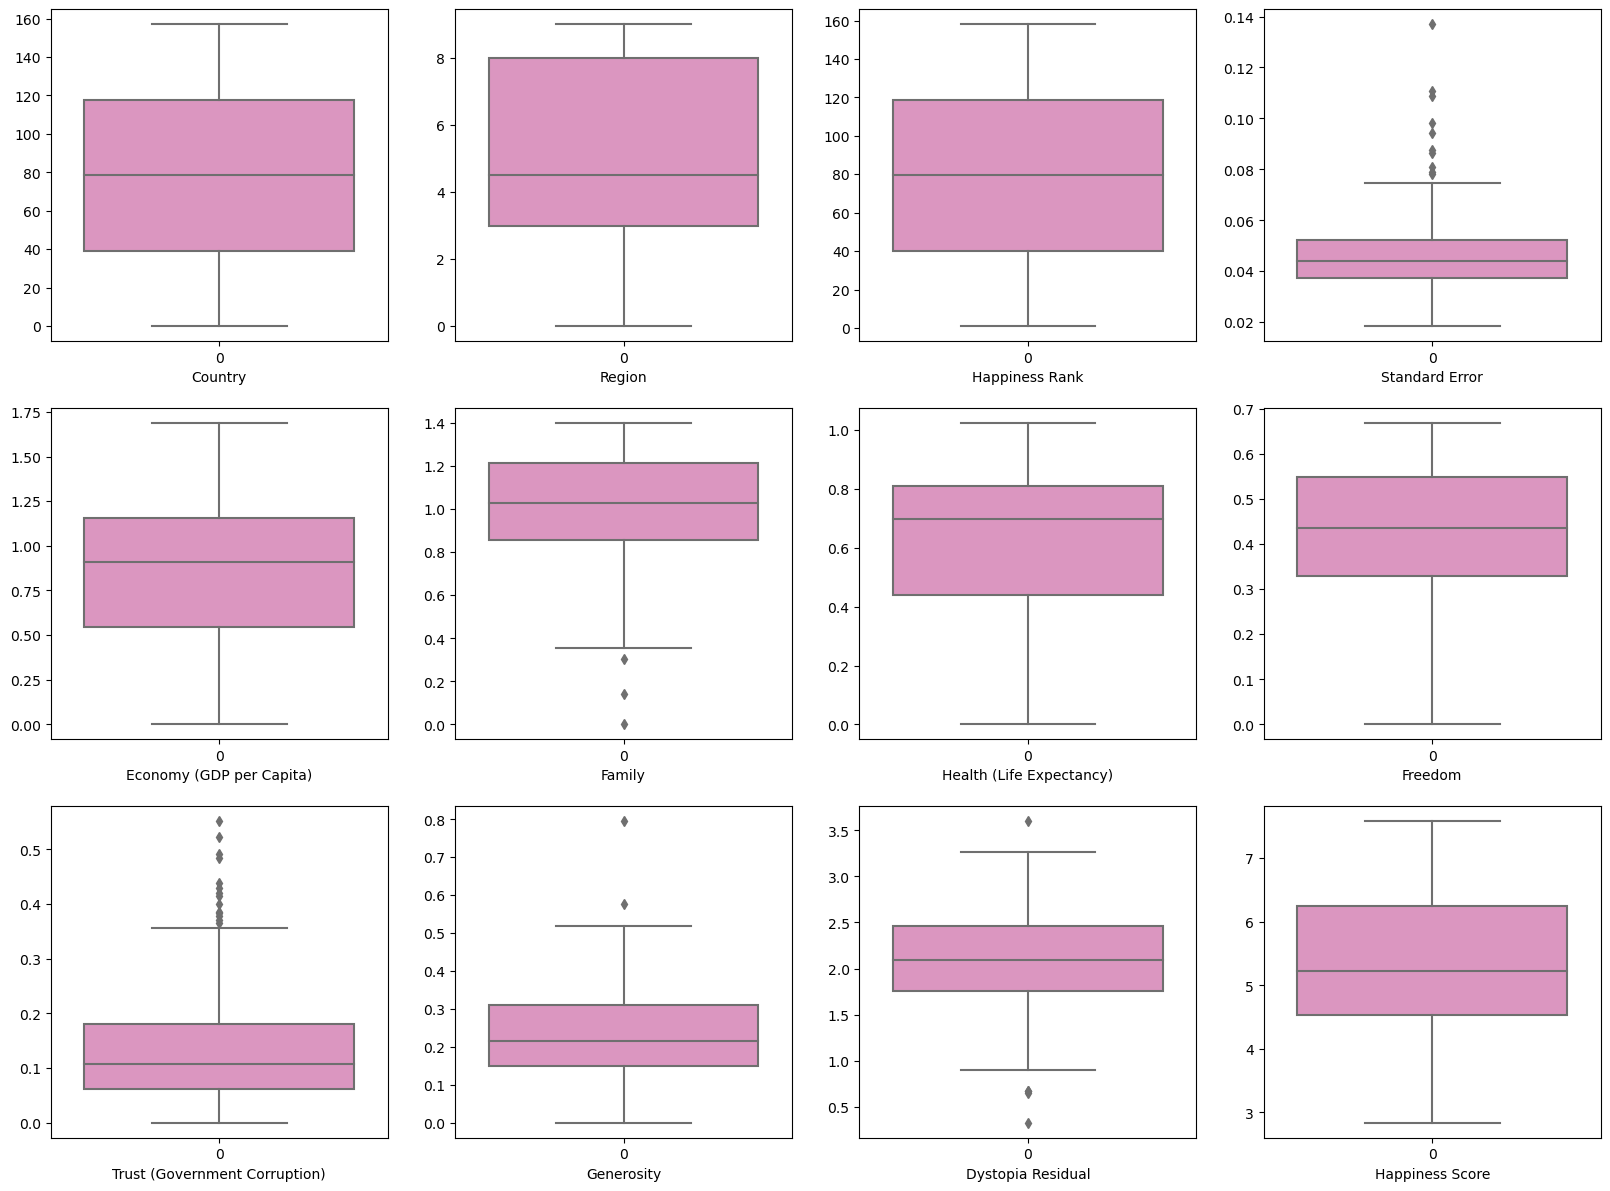

In [50]:
# checking for any outliers 

plt.figure(figsize = (20,25))
p = 1
for i in df:
    if p<=12:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [53]:
# removing outliers from columns

from scipy.stats import zscore
out_features = df[['Standard Error', 'Family', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
z = np.abs(zscore(out_features))
z

,Standard Error,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.320281,1.263408,2.309652,0.471040,0.758258
1,0.055889,1.514458,1.289434,0.016480,1.575856,1.092857
2,0.854487,1.361054,0.992229,2.842774,0.824293,0.712335
3,0.531526,1.251922,1.035145,1.852081,0.868638,0.663893
4,0.722845,1.221204,1.118054,1.555725,1.748563,0.639337
...,...,...,...,...,...,...
153,0.774917,0.800520,0.818610,3.413922,0.087228,2.588925
154,0.662582,2.346860,1.263362,0.529210,0.433117,0.843967
155,0.132534,1.901086,0.372199,0.381419,1.856891,3.208430
156,2.263962,2.118467,1.649648,0.357715,0.316950,0.481985


In [54]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157]),
 array([3, 0, 0, 0, 4, 1, 3, 5, 1]))

In [55]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(149, 12)

In [56]:
# compare shape of old and new dataframe

print("Old DataFrame : ", df.shape[0])
print("New DataFrame : ", df1.shape[0])

Old DataFrame :  158
New DataFrame :  149


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    int64  
 1   Region                         149 non-null    int64  
 2   Happiness Rank                 149 non-null    int64  
 3   Standard Error                 149 non-null    float64
 4   Economy (GDP per Capita)       149 non-null    float64
 5   Family                         149 non-null    float64
 6   Health (Life Expectancy)       149 non-null    float64
 7   Freedom                        149 non-null    float64
 8   Trust (Government Corruption)  149 non-null    float64
 9   Generosity                     149 non-null    float64
 10  Dystopia Residual              149 non-null    float64
 11  Happiness Score                149 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 15.1 KB


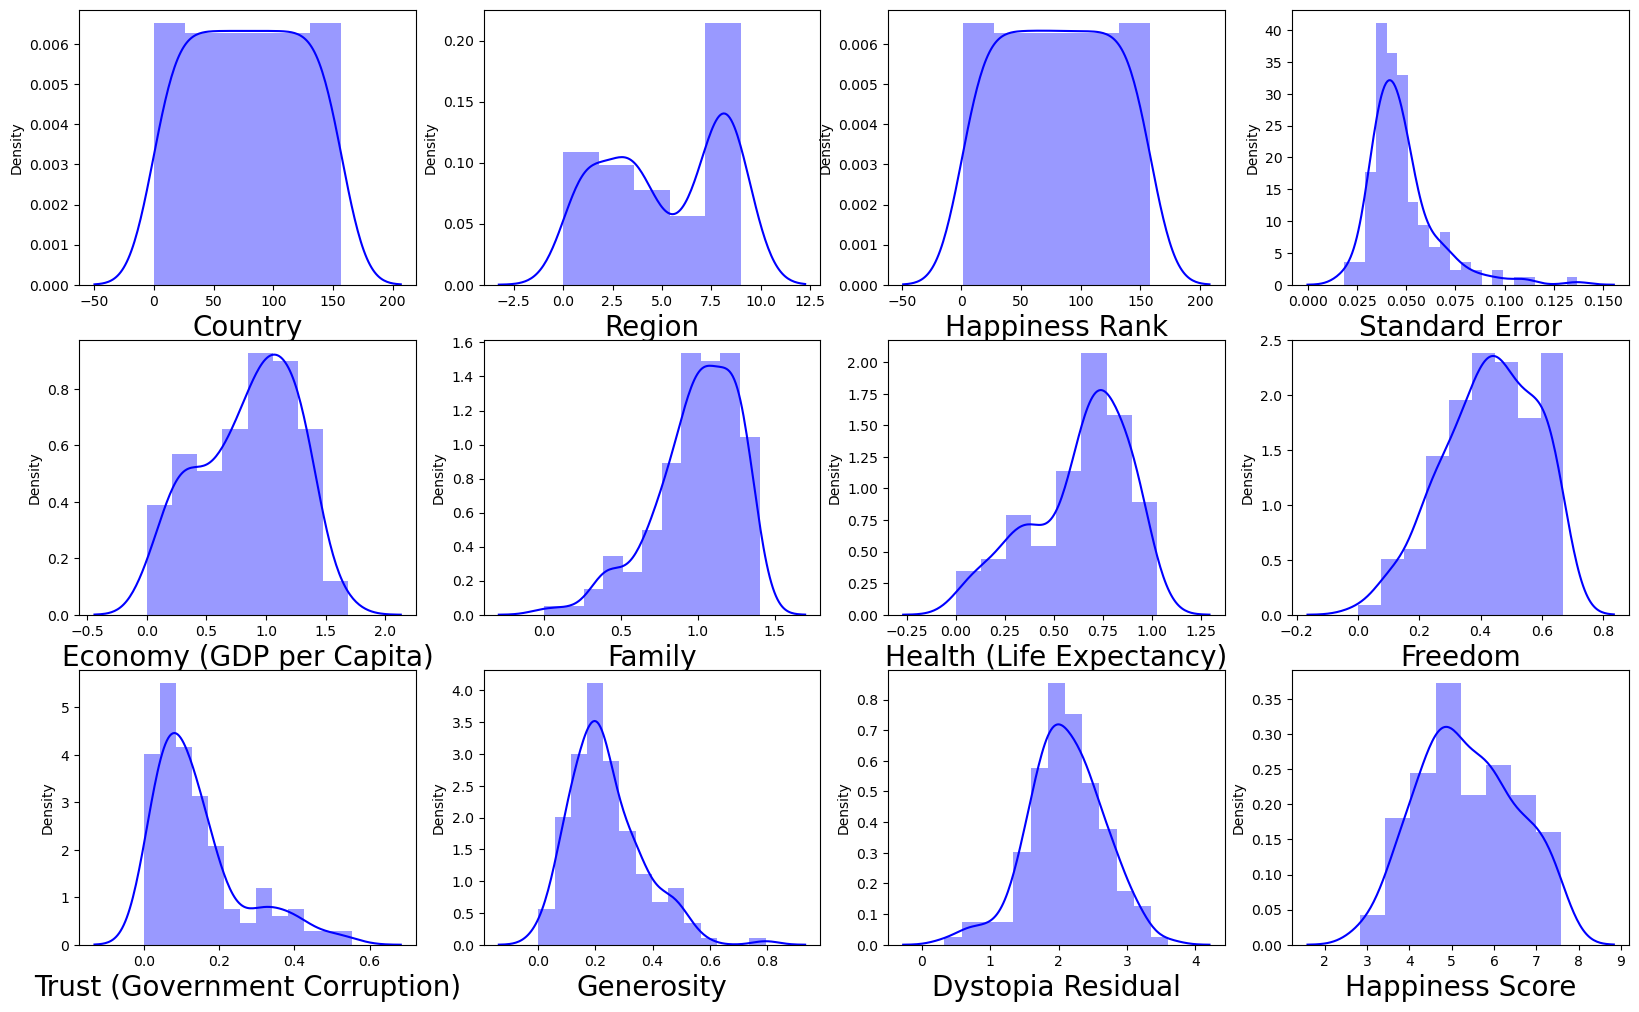

In [72]:
plt.figure(figsize = (20,25))
p1 = 1
for i in df:
    if p1<=12:
        ax = plt.subplot(6,4,p1)
        sns.distplot(df[i],color = 'b')
        plt.xlabel(i,fontsize = 20)
        
    p1+=1
plt.show()

In [68]:
df1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
Happiness Score                  0.169740
Standard Error                   0.528395
dtype: float64

In [70]:
# removing skewness using cuberoot method
df1['Standard Error'] = np.cbrt(df1['Standard Error'])
df1['Trust (Government Corruption)'] = np.cbrt(df1['Trust (Government Corruption)'])
df1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Standard Error                   0.262713
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
Happiness Score                  0.169740
Standard Error                   0.528395
dtype: float64

In [93]:
df1 = df1.drop(columns=['Standard Error'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    int64  
 1   Region                         149 non-null    int64  
 2   Happiness Rank                 149 non-null    int64  
 3   Economy (GDP per Capita)       149 non-null    float64
 4   Family                         149 non-null    float64
 5   Health (Life Expectancy)       149 non-null    float64
 6   Freedom                        149 non-null    float64
 7   Trust (Government Corruption)  149 non-null    float64
 8   Generosity                     149 non-null    float64
 9   Dystopia Residual              149 non-null    float64
 10  Happiness Score                149 non-null    float64
 11  Standard Error                 149 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 15.1 KB


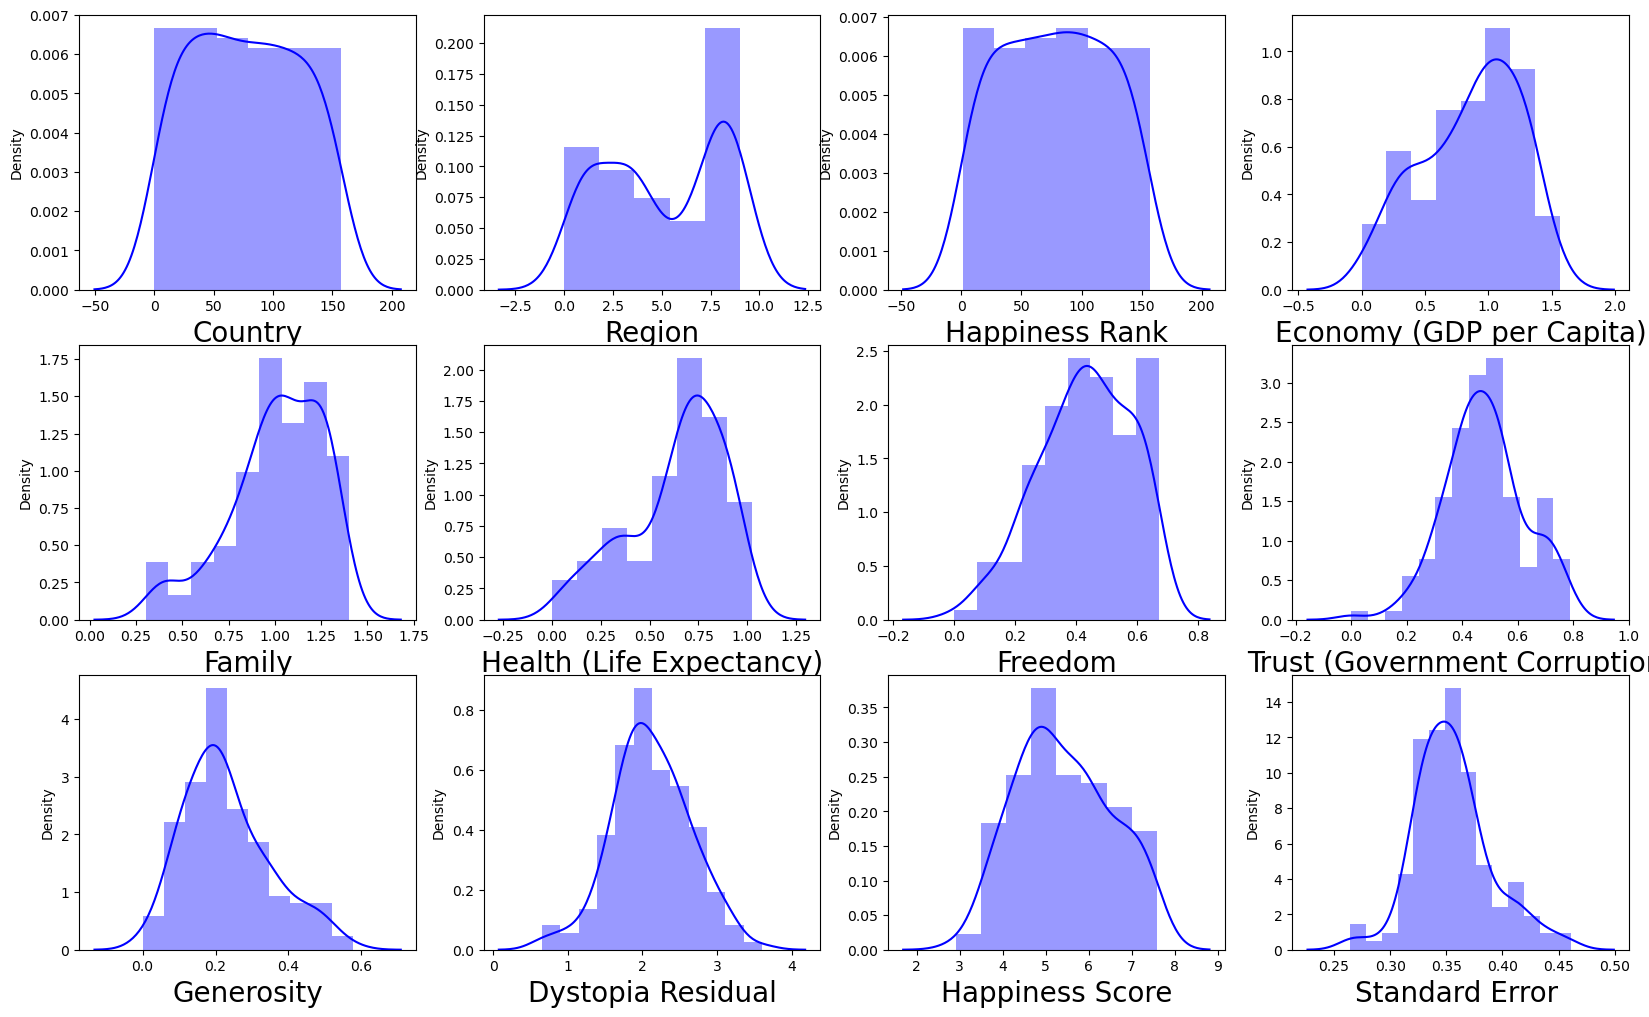

In [94]:
# graphs after removing the skewness
plt.figure(figsize = (20,25))
p1 = 1
for i in df1:
    if p1<=12:
        ax = plt.subplot(6,4,p1)
        sns.distplot(df1[i],color = 'b')
        plt.xlabel(i,fontsize = 20)
        
    p1+=1
plt.show()

# Correlation between Target and Independent variables

In [95]:
df1.corr()

,Country,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score,Standard Error
Country,1.000000,0.007739,-0.125380,0.039300,0.202403,0.036875,0.091495,0.044064,0.096685,0.048980,0.120109,-0.004480
Region,0.007739,1.000000,0.184520,-0.224928,-0.127749,-0.334531,0.101335,0.211246,0.305791,-0.059494,-0.145850,-0.047835
Happiness Rank,-0.125380,0.184520,1.000000,-0.773651,-0.720359,-0.736758,-0.571089,-0.365700,-0.225626,-0.526680,-0.992921,0.219425
Economy (GDP per Capita),0.039300,-0.224928,-0.773651,1.000000,0.628589,0.817470,0.376780,0.231317,0.020730,0.026936,0.773577,-0.244856
Family,0.202403,-0.127749,-0.720359,0.628589,1.000000,0.503890,0.474229,0.180054,0.154011,0.118062,0.720868,-0.129305
Health (Life Expectancy),0.036875,-0.334531,-0.736758,0.817470,0.503890,1.000000,0.382595,0.158670,0.129328,0.031212,0.729191,-0.343251
Freedom,0.091495,0.101335,-0.571089,0.376780,0.474229,0.382595,1.000000,0.482062,0.428718,0.058596,0.585066,-0.202292
Trust (Government Corruption),0.044064,0.211246,-0.365700,0.231317,0.180054,0.158670,0.482062,1.000000,0.241413,0.107929,0.394775,-0.095125
Generosity,0.096685,0.305791,-0.225626,0.020730,0.154011,0.129328,0.428718,0.241413,1.000000,-0.034239,0.250903,-0.155298
Dystopia Residual,0.048980,-0.059494,-0.526680,0.026936,0.118062,0.031212,0.058596,0.107929,-0.034239,1.000000,0.528334,0.028798


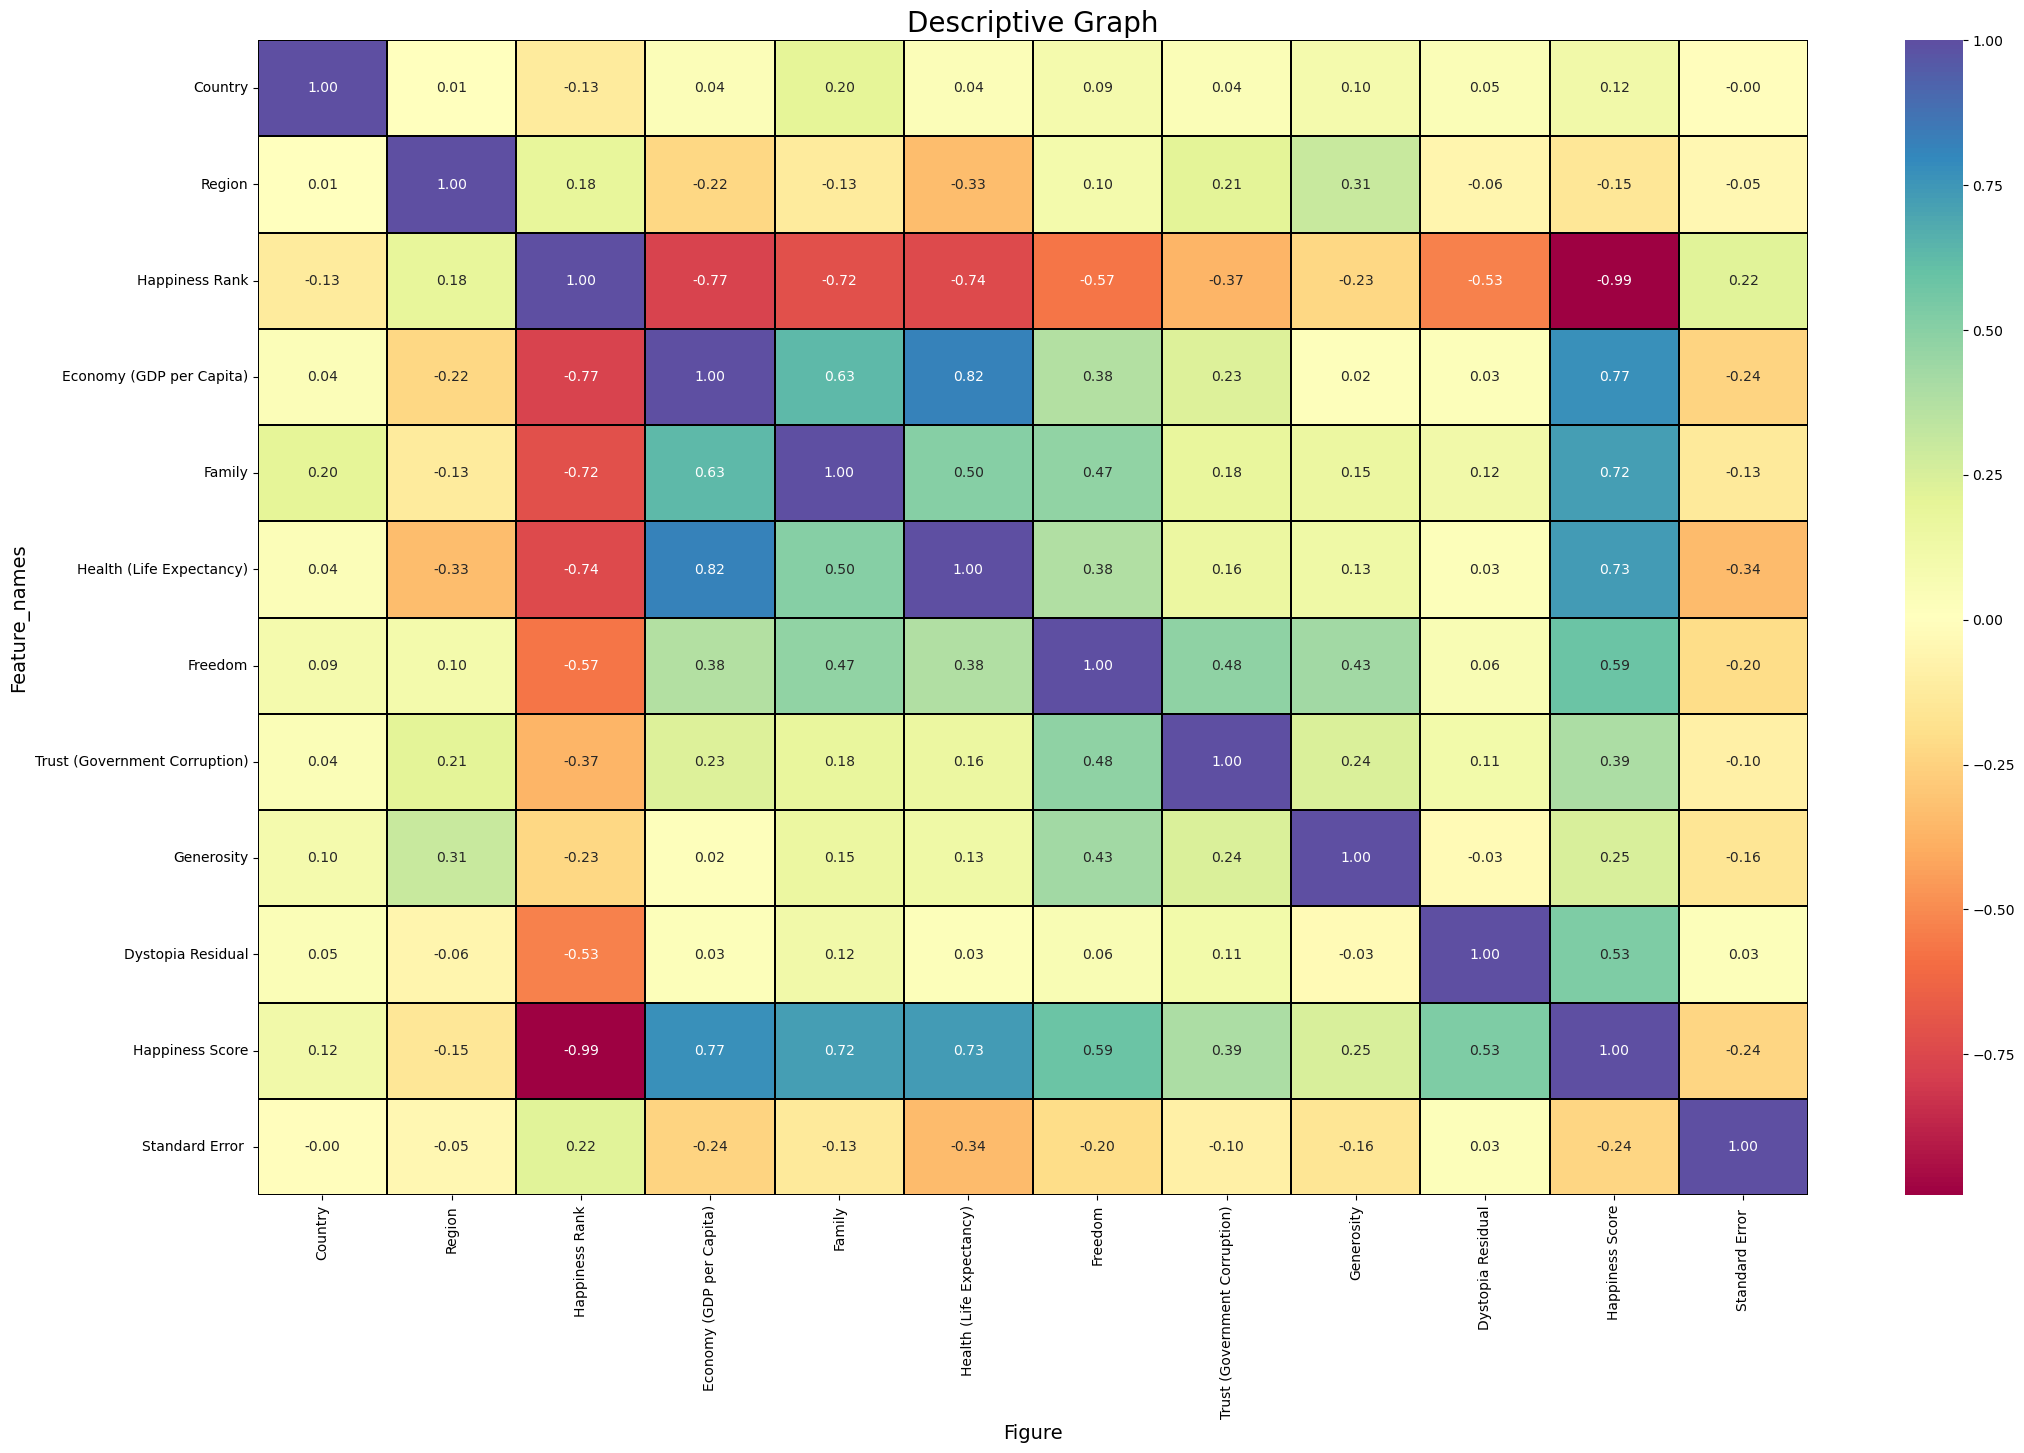

In [96]:
# correlation using heatmap

plt.figure(figsize = (25,15))
sns.heatmap(df1.corr(),annot = True, fmt = '0.2f', linewidth = 0.2, linecolor = 'black', cmap = 'Spectral')
plt.xlabel('Figure', fontsize = 14)
plt.ylabel("Feature_names", fontsize = 14)
plt.title("Descriptive Graph", fontsize = 20)
plt.show()

# build a model 

In [97]:
# Split the data into training and testing sets
X = df1.drop("Happiness Score", axis = 1)
y = df1["Happiness Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
X.head()

,Country,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error
0,135,9,1,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738,0.324310
1,58,9,2,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201,0.365532
2,37,9,3,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204,0.321658
3,105,9,4,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531,0.338540
4,24,5,5,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176,0.328749


In [99]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [100]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [102]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0009469061070565196
R-squared: 0.9992066414323763


                               Coefficient
Country                          -0.000052
Region                           -0.000154
Happiness Rank                   -0.001300
Economy (GDP per Capita)          0.976095
Family                            0.968258
Health (Life Expectancy)          0.948241
Freedom                           0.925319
Trust (Government Corruption)     0.697533
Generosity                        1.014540
Dystopia Residual                 0.951247
Standard Error                   -0.179816


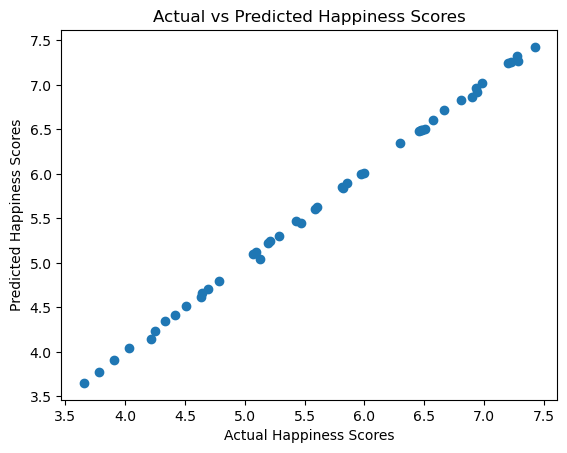

In [103]:
import matplotlib.pyplot as plt

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot actual vs predicted Happiness Scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

Problem 4 : Titanic survived Project
Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv

In [108]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [231]:
titanic_data = pd.read_csv("titanic_train (1).csv")

In [110]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:

# Drop unnecessary columns
titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [233]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# missing data

In [234]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
# missing values in columns 'Age', 'Cabin', 'Embarked'
# column 'Cabin' has to be dropped from the table

In [235]:
titanic_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [236]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace = True)

replacing the missing values with mode of the 'Embarked' column

In [237]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [238]:
# finding the number of people who survived

titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

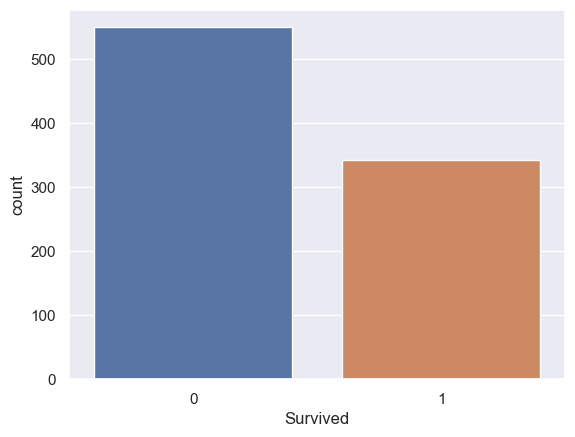

In [130]:
# make acount plot for survived column
sns.countplot(x='Survived', data=titanic_data)

# Show the plot
plt.show()

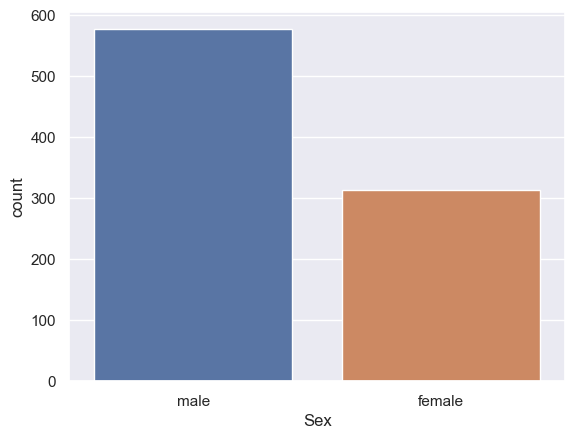

In [131]:
# make a count plot for gender column
sns.countplot(x='Sex', data=titanic_data)

# Show the plot
plt.show()

In [132]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

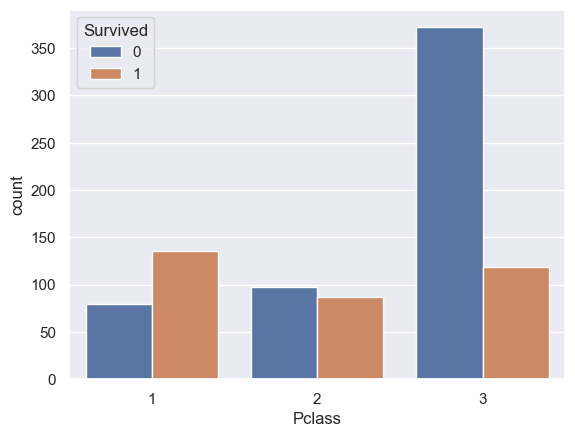

In [142]:
# number of survivors gender wise

# count plot for Pclass

sns.countplot(x='Pclass',hue='Survived', data=titanic_data)

# Show the plot
plt.show()

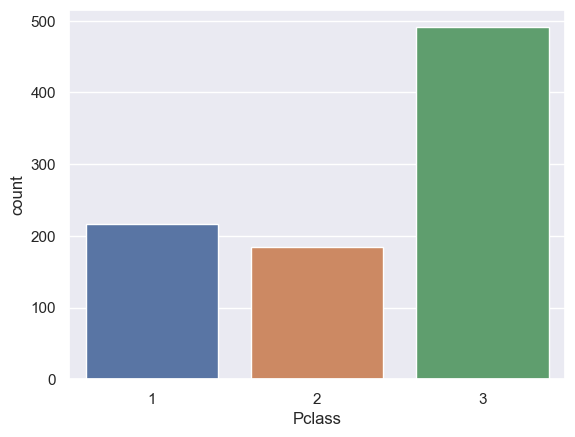

In [140]:
# count plot for Pclass

sns.countplot(x='Pclass', data=titanic_data)

# Show the plot
plt.show()

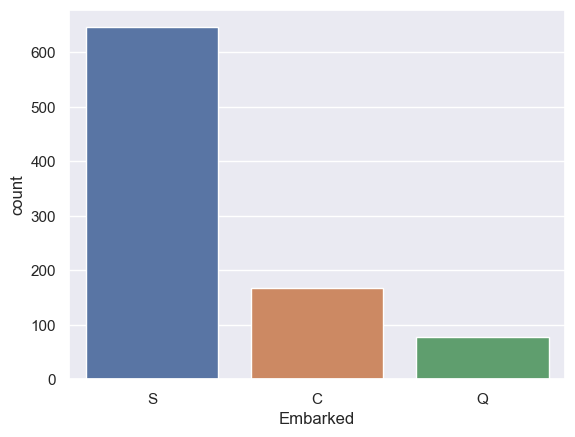

In [143]:
# count plot for Embarked

sns.countplot(x='Embarked', data=titanic_data)

# Show the plot
plt.show()

# Encoding categorical columns 

In [240]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [241]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# seperating feature and target

In [242]:
# Separate features and target
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

In [248]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [243]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare
0         3    1  22.000000      1      0   7.2500
1         1    0  38.000000      1      0  71.2833
2         3    0  26.000000      0      0   7.9250
3         1    0  35.000000      1      0  53.1000
4         3    1  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    1  27.000000      0      0  13.0000
887       1    0  19.000000      0      0  30.0000
888       3    0  29.699118      1      2  23.4500
889       1    1  26.000000      0      0  30.0000
890       3    1  32.000000      0      0   7.7500

[891 rows x 6 columns]


In [244]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [249]:
print(X.shape,X_train.shape,X_test.shape)

(891, 6) (712, 6) (179, 6)


# Model Training

# Logistic Regression

In [246]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [247]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [250]:
# Create and train the linear regression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [252]:
# Make predictions on test data
y_pred = LR.predict(X_test)


In [253]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.776536312849162


# Random Forest

In [254]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for random forest:",accuracy_score(Y_test,Y_pred2))

Accuracy Score for random forest: 0.8100558659217877


# SVC

In [255]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for svc:",accuracy_score(Y_test,Y_pred3))

Accuracy Score for svc: 0.6312849162011173


# Decision Tree

In [256]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for DT:",accuracy_score(Y_test,Y_pred4))

Accuracy Score for DT: 0.8044692737430168


# Gaussian Naive Bayes

In [258]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train,Y_train)
Y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for gaussian NB:",accuracy_score(Y_test,Y_pred5))

Accuracy Score for gaussian NB: 0.7597765363128491


# XGboost

In [259]:
import xgboost as xgb
model6 = xgb.XGBClassifier(random_state=1)
model6.fit(X_train, Y_train)
Y_pred6 = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score for xgboost:",accuracy_score(Y_test,Y_pred6))

Accuracy Score for xgboost: 0.7932960893854749


In [260]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, auc

# Assuming X_test and y_test are defined and are your test datasets.
# Also assuming the models are already trained and stored in variables:
# logistic_regression_model, decision_tree_model, random_forest_model, knn_model, svm_model

models = {
    "Logistic Regression": LR,
    "Random Forest": model2,
    "Support Vector Machine": model3,
    "Decision Tree": model4,
    "Gaussian Naive Bayes": model5,
    "XGboost": model6
}

evaluation_metrics = {}

for model_name, model in models.items():
# Predict probabilities (for ROC-AUC score) and classes
    Y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    Y_pred = model.predict(X_test)
    
# Calculate precision, recall, F1-score, and ROC-AUC
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    roc_auc = roc_auc_score(Y_test, Y_prob, multi_class='ovr', average='weighted')
    
    evaluation_metrics[model_name] = {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC Score": roc_auc
    }

# Display the evaluation metrics
import pandas as pd

metrics_df = pd.DataFrame(evaluation_metrics).transpose()
print(metrics_df)

                        Precision    Recall  F1 Score  ROC-AUC Score
Logistic Regression      0.783116  0.776536  0.771396       0.823797
Random Forest            0.811513  0.810056  0.808161       0.856835
Support Vector Machine   0.685606  0.631285  0.570397       0.728734
Decision Tree            0.805280  0.804469  0.802774       0.803165
Gaussian Naive Bayes     0.762577  0.759777  0.755557       0.796835
XGboost                  0.797839  0.793296  0.789666       0.848354


In evaluating various machine learning models for their performance, the Random Forest model exhibited the highest scores across key metrics with a precision of 0.811, recall of 0.810, F1 score of 0.808, and ROC-AUC of 0.857. 

Logistic Regression and XGBoost also performed well, with F1 scores of 0.771 and 0.790, and ROC-AUC scores of 0.824 and 0.848, respectively. The Decision Tree model showed solid performance close to Random Forest, while Gaussian Naive Bayes had slightly lower scores. The Support Vector Machine lagged behind, particularly in F1 score and ROC-AUC, indicating lower overall performance compared to the other models.